# Processamento de imagens com python e scikit-image

In [89]:
% matplotlib inline
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import skimage
import skimage.data
import skimage.filters
import seaborn as sns
import numpy as np
from skimage.exposure import equalize_hist
from skimage.feature import local_binary_pattern, hog

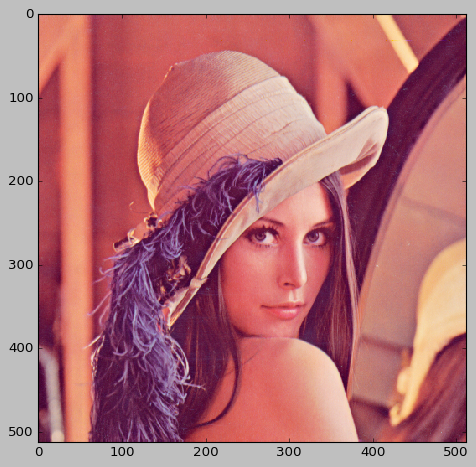

In [6]:
img = imread('lena.png')
imshow(img)

In [12]:
# Imagens são matrizes (numpy arrays) com formato HxWxC
print(img.shape)

# O tipo é uin8 [0, 255]
print(img.dtype)

(512, 512, 3)
uint8


In [15]:
# Acessando um pixel no canal Red
(i, j, k) = (55, 26, 0)
print(img[i, j, k])

# Acessando um pixel nos canais RGB
(i, j) = (55, 26)
print(img[i, j], img[i, j, :])

214
[214  92  81] [214  92  81]


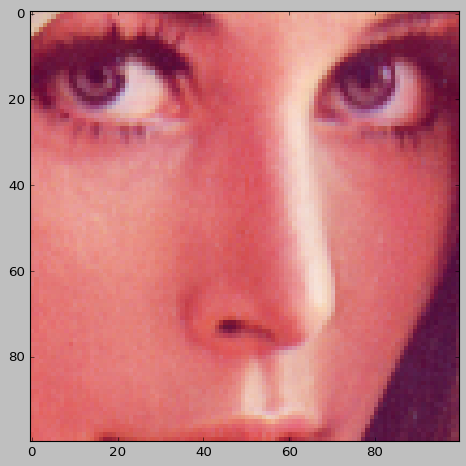

In [16]:
# cropando a imagem
(ib, jb) = (250, 250)
(ie, je) = (350, 350)
imshow(img[ib:ie, jb:je])

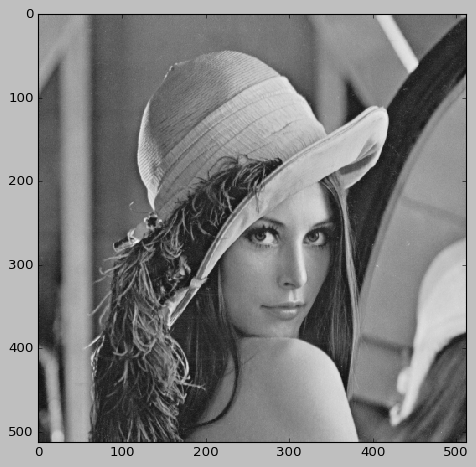

In [20]:
# convertendo para grayscale
gray = rgb2gray(img)
imshow(gray)

In [28]:
# o tipo ainda é uint8
print(img.dtype)

# mas é possível mudar para float
imgf = skimage.img_as_float(img)
print(imgf.dtype)

uint8
float64


In [53]:
# comparando uma imagem uint8 com uma imagem float64
(i, j) = (10, 56)
print(img[i, j], imgf[i, j])

(i, j) = (448, 327)
print(img[i, j], imgf[i, j])

[225 113  93] [ 0.88235294  0.44313725  0.36470588]
[232 171 152] [ 0.90980392  0.67058824  0.59607843]


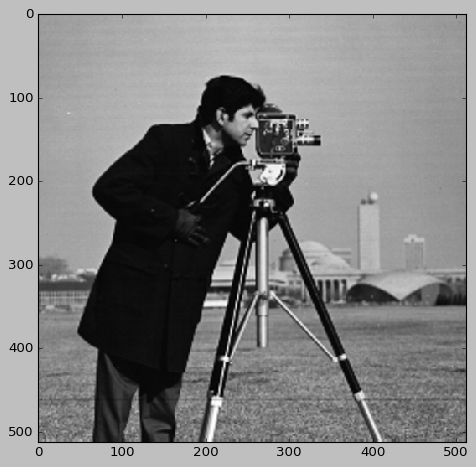

In [54]:
# carregando imagens disponíveis no scikit-image
imshow(skimage.data.camera())

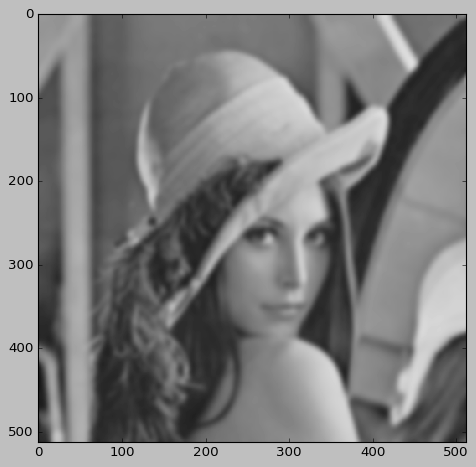

In [55]:
# aplicando um filtro gaussiano
gaussian = skimage.filters.gaussian(gray, sigma=3)
imshow(gaussian)

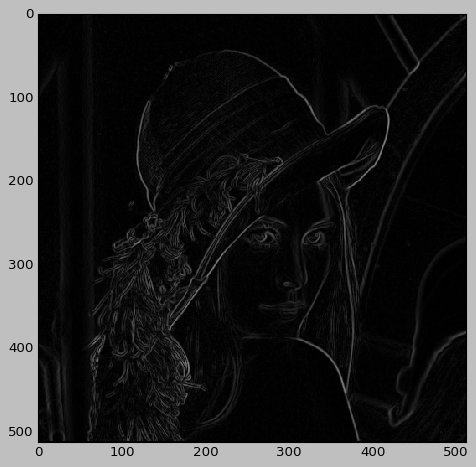

In [56]:
# evidenciando arestas com o filtro de sobel
sobel = skimage.filters.sobel(gray)
imshow(sobel)

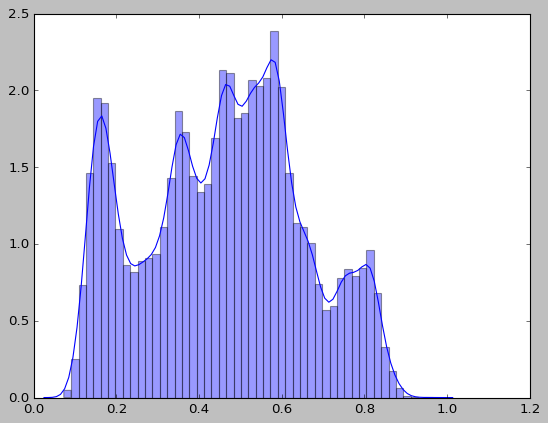

In [60]:
sns.distplot(gray.ravel())

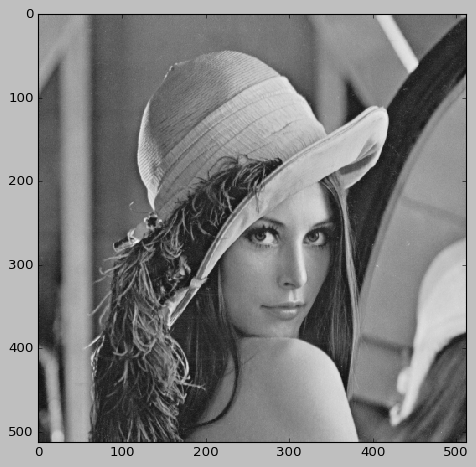

In [61]:
imshow(gray)

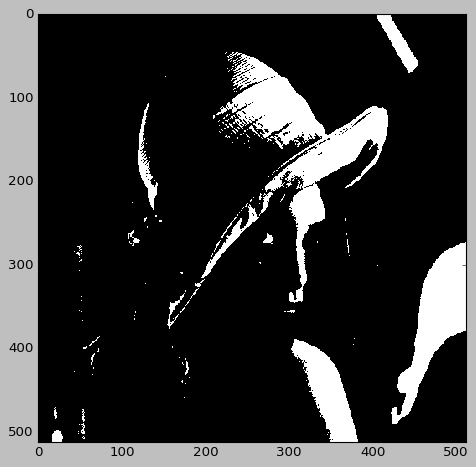

In [67]:
threshold = gray.copy()
threshold[threshold > 0.7] = 1.0
threshold[threshold <= 0.7] = 0.0
imshow(threshold)

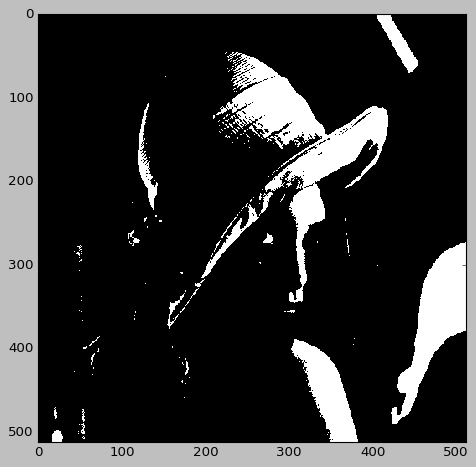

In [69]:
threshold = gray > 0.7
imshow(threshold)

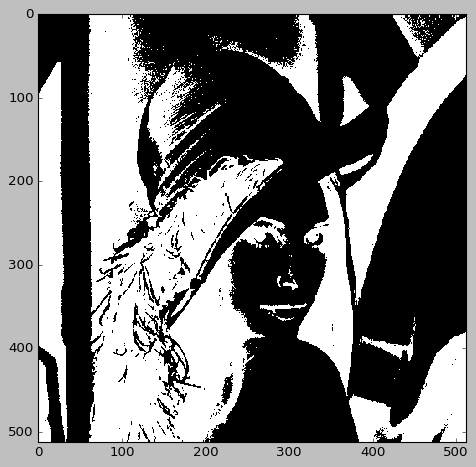

In [76]:
t = skimage.filters.threshold_otsu(gray, nbins=256)
threshold = gray <= t
imshow(threshold)

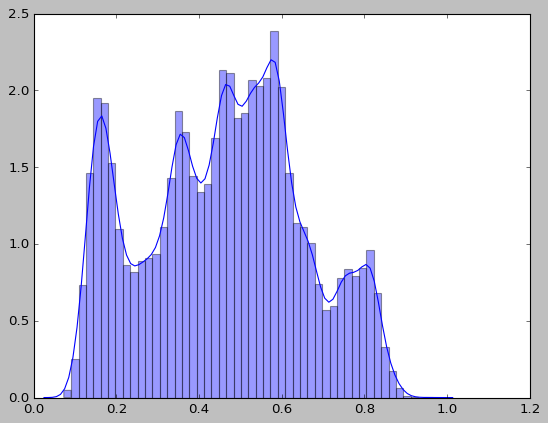

In [77]:
sns.distplot(gray.ravel())

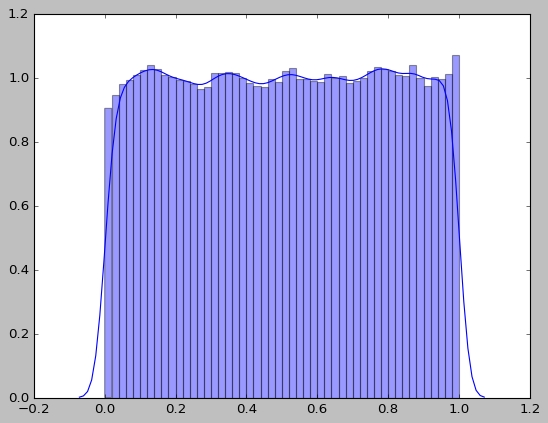

In [80]:
equalized = equalize_hist(gray)
sns.distplot(equalized.ravel())

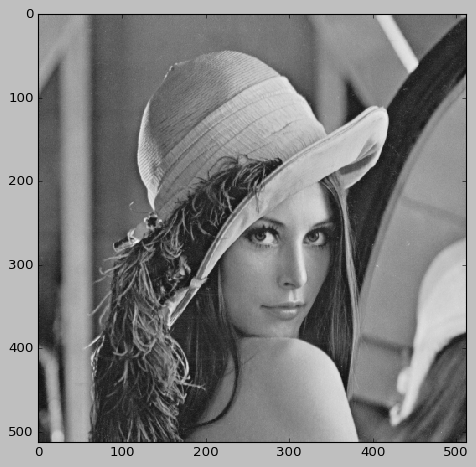

In [82]:
imshow(gray)

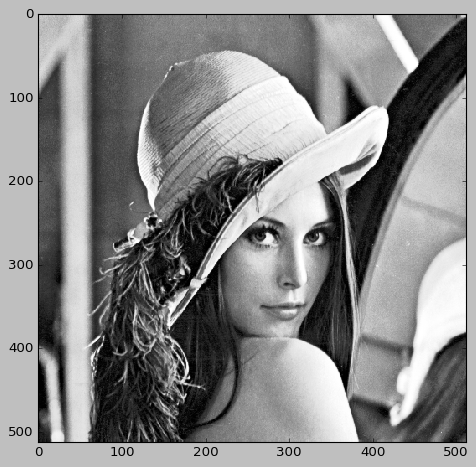

In [83]:
imshow(equalized)

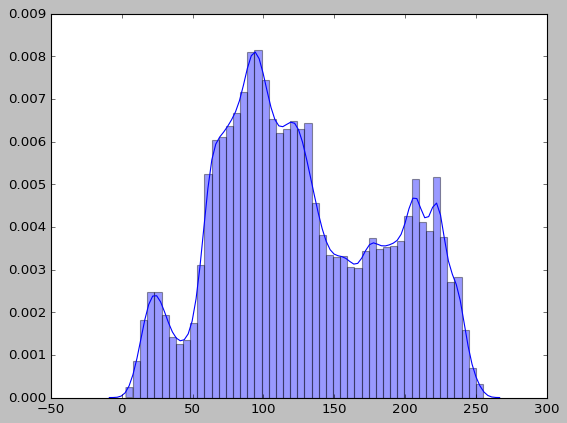

In [84]:
sns.distplot(img.ravel())

/home/julio/.local/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


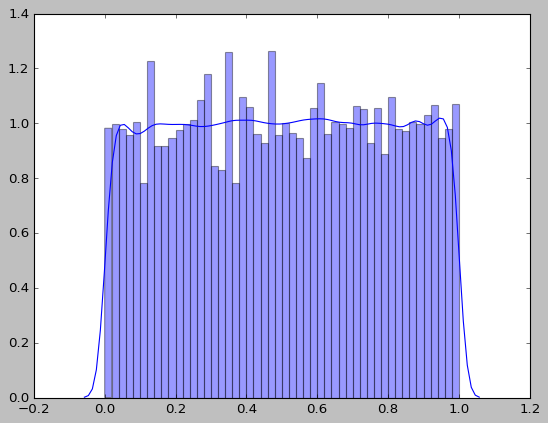

In [85]:
equalized = equalize_hist(img)
sns.distplot(equalized.ravel())

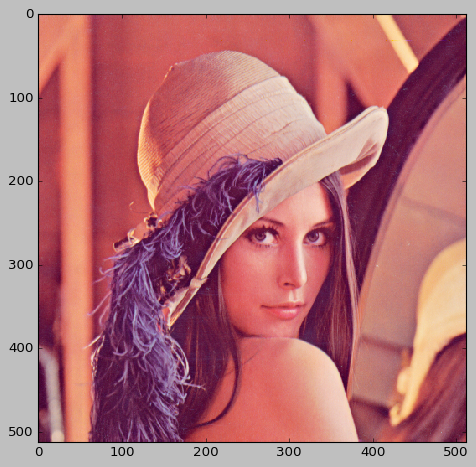

In [86]:
imshow(img)

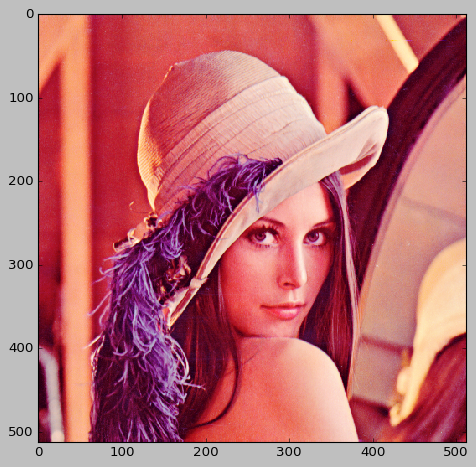

In [87]:
imshow(equalized)

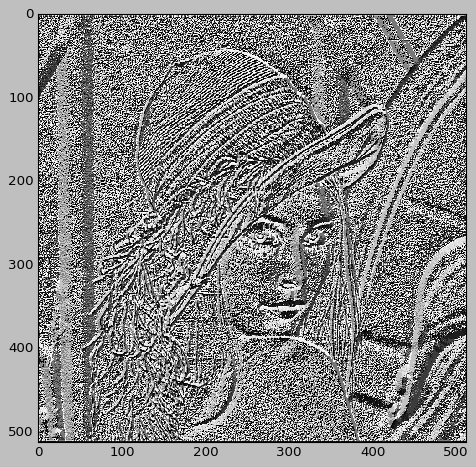

In [93]:
# local binary patterns
lbp = local_binary_pattern(gray, P=8, R=1).astype('uint8')
imshow(lbp)

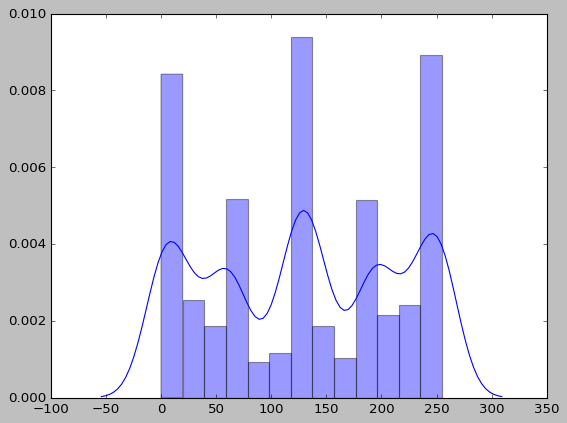

In [94]:
lbp_slice = lbp[400:450, 100:150]
sns.distplot(lbp_slice.ravel())

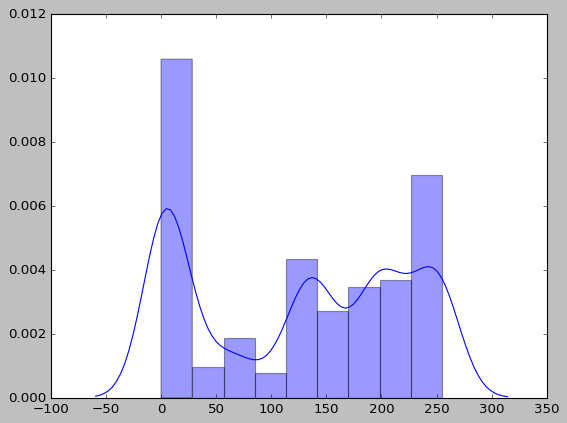

In [95]:
lbp_slice = lbp[400:450, 300:350]
sns.distplot(lbp_slice.ravel())

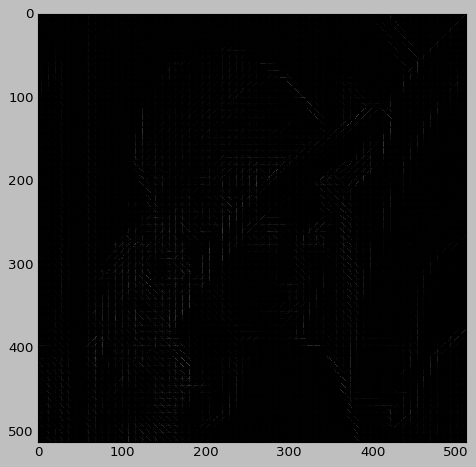

In [106]:
# Histogram of Oriented Gradients (HOG)
(features, hog_img) = hog(gray,
                          orientations=4,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualise=True)

imshow(hog_img)